# Comparing Rates

### Requirements:
1. `numpy`
2. `statsmodels`
3. `matplotlib`
4. `scipy`

In [1]:
import numpy as np

import statsmodels
import statsmodels.api

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import scipy
import scipy.stats


In [2]:
import numpy as np

rng = np.random.default_rng(seed=520610)


def produce_samples_from_rate(rate: float, n: int) -> np.ndarray:
    samples = np.array(
        [0] * int(np.round((1 - rate) * n)) + [1] * int(np.round(rate * n))
    )
    rng.shuffle(samples)

    return samples


rate_1 = 0.7
samples_1 = produce_samples_from_rate(rate=rate_1, n=10)

rate_2 = 0.8
samples_2 = produce_samples_from_rate(rate=rate_2, n=10)


In [3]:
print(rate_1, samples_1)
print(rate_2, samples_2)


0.7 [1 1 1 0 1 1 0 1 0 1]
0.8 [1 1 0 1 1 1 0 1 1 1]


## Theming

In [104]:
themes = {
    "light": {
        "color_text": "#181a20",
        "color_background": "#fafafa",
        "color_primary": "#1a8fe3",
        "color_2": "#ff73b4",
        "color_3": "#4fcb8c",
        "color_4": "#fe9d3a",
    },
    "dark": {
        "color_text": "#fafafa",
        "color_background": "#181a20",
        "color_primary": "#1a8fe3",
        "color_2": "#ff73b4",
        "color_3": "#4fcb8c",
        "color_4": "#fe9d3a",
    },
}


def update_theme(theme: str) -> None:
    globals()["theme"] = theme
    globals()["color_text"] = themes[theme]["color_text"]
    globals()["color_background"] = themes[theme]["color_background"]
    globals()["color_primary"] = themes[theme]["color_primary"]
    globals()["color_2"] = themes[theme]["color_2"]
    globals()["color_3"] = themes[theme]["color_3"]
    globals()["color_4"] = themes[theme]["color_4"]


def color_axis(ax, color: str):
    ax.tick_params(axis="both", colors=color)

    ax.xaxis.label.set_color(color)
    ax.yaxis.label.set_color(color)

    ax.title.set_color(color)

    for _, spine in ax.spines.items():
        spine.set_color(color)


## Frequentist Treatment

### Measures for Rate Differences

In [5]:
def risk_difference(rate_a: float, rate_b: float) -> float:
    return rate_b - rate_a


def number_need_to_treat(rate_a: float, rate_b: float) -> float:
    return 1 / (rate_b - rate_a)


def relative_risk(rate_a: float, rate_b: float) -> float:
    return rate_b / rate_a


def relative_risk_reduction(rate_a: float, rate_b: float) -> float:
    return 1 - (rate_b / rate_a)


def relative_risk_increase(rate_a: float, rate_b: float) -> float:
    return (rate_b / rate_a) - 1


In [15]:
update_theme("light")


/tmp/ipykernel_3227322/2152574191.py:6: RuntimeWarning: divide by zero encountered in divide
  return 1 / (rate_b - rate_a)


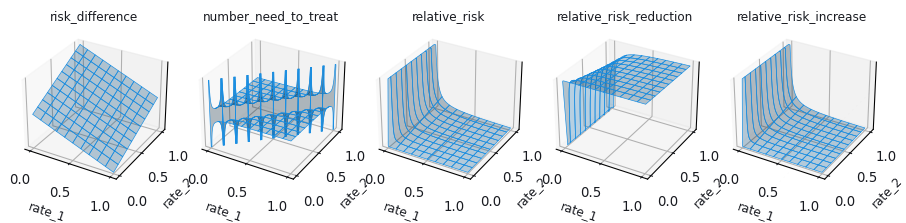

In [16]:
rates_a = np.linspace(0.0 + 1e-3, 1.0 - 1e-3, num=1000)
rates_b = np.linspace(0.0 + 1e-3, 1.0 - 1e-3, num=1000)

rates_a_mesh, rates_b_mesh = np.meshgrid(rates_a, rates_b)

fig = plt.figure(figsize=(900 / 96, 300 / 96), dpi=96)


def plot_metric_vals_3d(pos, metric_vals, title: str = "", clip: bool = False):
    if clip:
        extrema = np.quantile(metric_vals, [0.01, 0.99])
        metric_vals = np.clip(metric_vals, *extrema)

    ax = fig.add_subplot(*pos, projection="3d")

    ax.plot_surface(
        rates_a_mesh,
        rates_b_mesh,
        metric_vals,
        edgecolor=color_primary,
        lw=0.5,
        rstride=100,
        cstride=100,
        alpha=0.3,
    )

    ax.set_xlabel("rate_1", fontsize=9)
    ax.set_ylabel("rate_2", fontsize=9)

    ax.set_zticks([])

    ax.set_title(title, fontsize=9)

    color_axis(ax, color=color_text)


plot_metric_vals_3d(
    (1, 5, 1),
    risk_difference(rates_a_mesh, rates_b_mesh),
    title="risk_difference",
    clip=False,
)

plot_metric_vals_3d(
    (1, 5, 2),
    number_need_to_treat(rates_a_mesh, rates_b_mesh),
    title="number_need_to_treat",
    clip=True,
)

plot_metric_vals_3d(
    (1, 5, 3),
    relative_risk(rates_a_mesh, rates_b_mesh),
    title="relative_risk",
    clip=True,
)

plot_metric_vals_3d(
    (1, 5, 4),
    relative_risk_reduction(rates_a_mesh, rates_b_mesh),
    title="relative_risk_reduction",
    clip=True,
)

plot_metric_vals_3d(
    (1, 5, 5),
    relative_risk_increase(rates_a_mesh, rates_b_mesh),
    title="relative_risk_increase",
    clip=True,
)

fig.tight_layout()


In [17]:
fig.savefig(f"./figures/naive_risk_differences_{theme}.webp", transparent=True)


### The Problem with Rate Differences

In [18]:
print(f"Rates ratio: {rate_1 / rate_2:.4f}")
print(f"Complementary rates ratio: {(1 - rate_1) / (1 - rate_2):.4f}")


Rates ratio: 0.8750
Complementary rates ratio: 1.5000


### Odds

In [19]:
def odds(rate: float) -> float:
    return rate / (1 - rate)


def odds_ratio(rate_a: float, rate_b: float) -> float:
    return odds(rate_b) / odds(rate_a)


def log_odds_ratio(rate_a: float, rate_b: float) -> float:
    return np.log(odds(rate_b)) - np.log(odds(rate_a))


In [20]:
print(f"Odds ratio: {odds_ratio(rate_1, rate_2):.4f}")
print(f"Complementary odds ratio: {odds_ratio(1-rate_1, 1-rate_2):.4f}")


Odds ratio: 1.7143
Complementary odds ratio: 0.5833


In [21]:
np.allclose(odds_ratio(rate_1, rate_2), 1 / odds_ratio(1 - rate_1, 1 - rate_2))


True

In [22]:
print(f"Log-odds ratio: {log_odds_ratio(rate_1, rate_2):.4f}")
print(f"Complementary log-odds ratio: {log_odds_ratio(1-rate_1, 1-rate_2):.4f}")


Log-odds ratio: 0.5390
Complementary log-odds ratio: -0.5390


### The log-odds ratio is asymptotically normally distributed

In [23]:
def sample_rates(n: int, p: float, size: int) -> np.ndarray:
    num_hits = rng.binomial(n=n, p=p, size=size)
    rates = num_hits / n

    return rates


In [28]:
update_theme("dark")


/tmp/ipykernel_3227322/2911438240.py:2: RuntimeWarning: divide by zero encountered in divide
  return rate / (1 - rate)
/tmp/ipykernel_3227322/2911438240.py:6: RuntimeWarning: invalid value encountered in divide
  return odds(rate_b) / odds(rate_a)
/tmp/ipykernel_3227322/2911438240.py:10: RuntimeWarning: invalid value encountered in subtract
  return np.log(odds(rate_b)) - np.log(odds(rate_a))


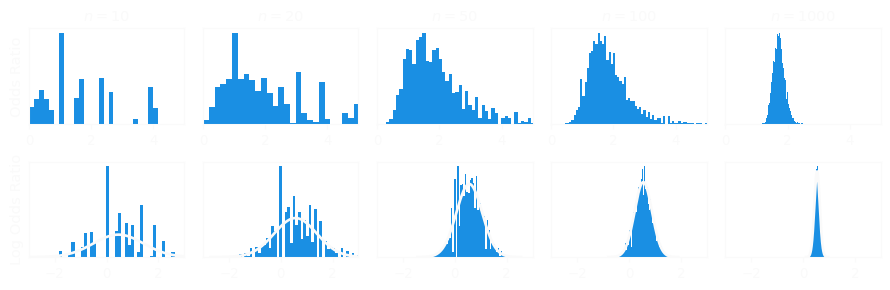

In [29]:
fig, axes = plt.subplots(2, 5, figsize=(900 / 96, 300 / 96), dpi=96)

for col_num, n in enumerate([10, 20, 50, 100, 1000]):
    rate_1_samples = sample_rates(n=n, p=rate_1, size=10000)
    rate_2_samples = sample_rates(n=n, p=rate_2, size=10000)

    # Plot odds ratio ==========================================================
    sampled_odds_ratio = odds_ratio(rate_1_samples, rate_2_samples)
    sampled_odds_ratio = sampled_odds_ratio[np.isfinite(sampled_odds_ratio)]

    axes[0, col_num].hist(
        sampled_odds_ratio,
        bins="auto",
        density=True,
        facecolor=color_primary,
    )

    sampled_log_odds_ratio = log_odds_ratio(rate_1_samples, rate_2_samples)
    sampled_log_odds_ratio = sampled_log_odds_ratio[np.isfinite(sampled_log_odds_ratio)]

    axes[0, col_num].set_xlim(0, 5)

    # Plot log-odds ratio ======================================================
    axes[1, col_num].hist(
        sampled_log_odds_ratio,
        bins="auto",
        density=True,
        alpha=1.0,
        facecolor=color_primary,
    )

    mu = np.mean(sampled_log_odds_ratio)
    sigma = np.std(sampled_log_odds_ratio)
    x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
    axes[1, col_num].plot(x, scipy.stats.norm.pdf(x, mu, sigma), c=color_text, lw=2)

    axes[1, col_num].set_xlim(-3, 3)

    # Misc. ====================================================================
    axes[0, col_num].set_yticks([])
    axes[1, col_num].set_yticks([])

    axes[0, col_num].set_title(f"$n={n}$", fontsize=11)

    if col_num == 0:
        axes[0, col_num].set_ylabel("Odds Ratio", fontsize=11)
        axes[1, col_num].set_ylabel("Log Odds Ratio", fontsize=11)

    color_axis(axes[0, col_num], color_text)
    color_axis(axes[1, col_num], color_text)

fig.tight_layout()


In [30]:
fig.savefig(
    f"./figures/odds_and_log_odds_ratio_distributions_{theme}.webp",
    transparent=True,
)


### The $z$-test

/tmp/ipykernel_3227322/2911438240.py:2: RuntimeWarning: divide by zero encountered in divide
  return rate / (1 - rate)
/tmp/ipykernel_3227322/2911438240.py:10: RuntimeWarning: invalid value encountered in subtract
  return np.log(odds(rate_b)) - np.log(odds(rate_a))


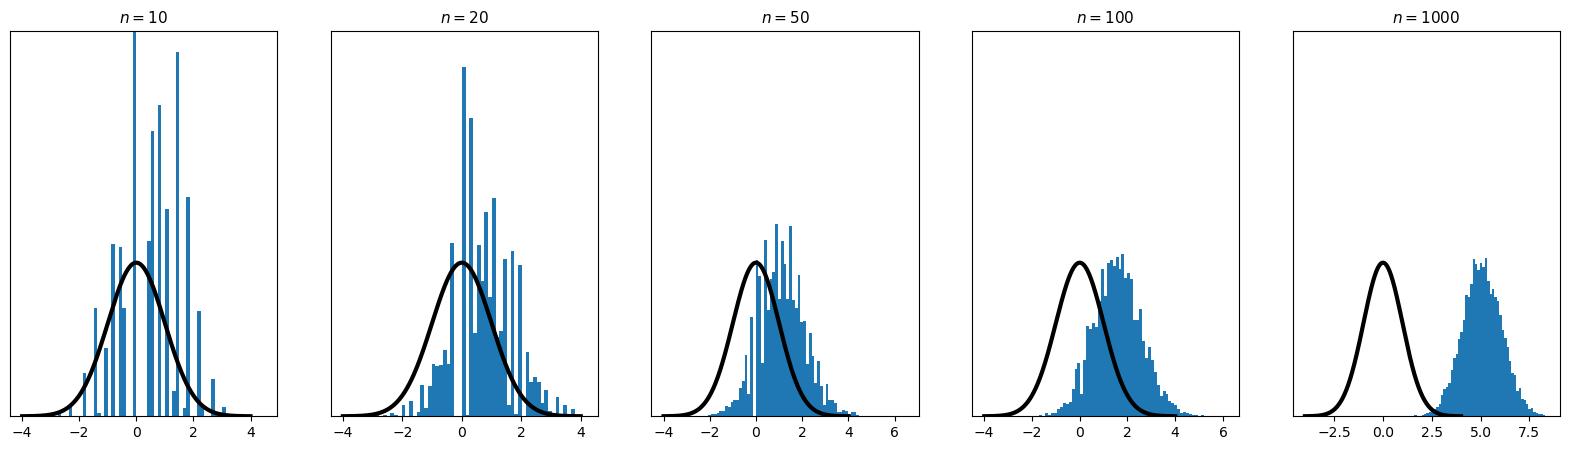

In [31]:
H = 0.0

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for col_num, n in enumerate([10, 20, 50, 100, 1000]):
    rate_1_samples = sample_rates(n=n, p=rate_1, size=10000)
    rate_2_samples = sample_rates(n=n, p=rate_2, size=10000)

    sampled_log_odds_ratio = log_odds_ratio(rate_1_samples, rate_2_samples)
    sampled_log_odds_ratio = sampled_log_odds_ratio[np.isfinite(sampled_log_odds_ratio)]

    effect_size_distribution = (sampled_log_odds_ratio - H) / np.std(
        sampled_log_odds_ratio
    )

    axes[col_num].hist(effect_size_distribution, bins="auto", density=True, alpha=1.0)

    x = np.linspace(-4, 4, 1000)
    axes[col_num].plot(x, scipy.stats.norm.pdf(x, 0.0, 1.0), c="black", lw=3)

    axes[col_num].set_ylim(0, 1)
    axes[col_num].set_yticks([])
    axes[col_num].set_yticks([])

    axes[col_num].set_title(f"$n={n}$", fontsize=11)


In [32]:
def z_test(
    rate_a: float, rate_b: float, n: int, alpha: float = 0.95, H: float = 0.0
) -> float:
    z_critical = scipy.stats.norm.ppf((1 - alpha) / 2)

    mean = log_odds_ratio(rate_a, rate_b)

    se = np.sqrt(
        1 / (rate_a * n)
        + 1 / (n - rate_a * n)
        + 1 / (rate_b * n)
        + 1 / (n - rate_b * n)
    )

    ci_lb = mean - np.abs(z_critical) * se
    ci_ub = mean + np.abs(z_critical) * se

    mean_effect_size = (mean - H) / se

    p_value = scipy.stats.norm.cdf(mean_effect_size)

    significant = False
    if p_value <= 1 - alpha:
        significant = True

    result = f"The difference between experiment 1 (rate={rate_a:.2f}, n={n}) and experiment 2 (rate={rate_b:.2f}, n={n}) {'is' if significant else 'is not'}\nsignificant at the {alpha*100:.0f}% confidence level (log odds-ratio={mean:.4f} [{ci_lb:.4f}, {ci_ub:.4f}], z={mean_effect_size:.4f}, p={p_value:.4f}])."

    return result


In [33]:
print(z_test(rate_1, rate_2, n=10, alpha=0.95, H=0))


The difference between experiment 1 (rate=0.70, n=10) and experiment 2 (rate=0.80, n=10) is not
significant at the 95% confidence level (log odds-ratio=0.5390 [-1.5177, 2.5957], z=0.5136, p=0.6962]).


In [34]:
print(z_test(rate_1, rate_2, n=100, alpha=0.95, H=0))


The difference between experiment 1 (rate=0.70, n=100) and experiment 2 (rate=0.80, n=100) is not
significant at the 95% confidence level (log odds-ratio=0.5390 [-0.1114, 1.1894], z=1.6243, p=0.9478]).


In [35]:
print(z_test(rate_1, rate_2, n=1000, alpha=0.95, H=0))


The difference between experiment 1 (rate=0.70, n=1000) and experiment 2 (rate=0.80, n=1000) is not
significant at the 95% confidence level (log odds-ratio=0.5390 [0.3333, 0.7447], z=5.1364, p=1.0000]).


In [49]:
samples_1 = produce_samples_from_rate(0.7, n=10)
samples_2 = produce_samples_from_rate(0.8, n=10)


In [63]:
statsmodels.stats.weightstats.ztest(
    x1=samples_1,
    x2=samples_2,
    alternative="two-sided",
)


(np.float64(-0.49319696191607226), np.float64(0.6218734243307407))

## Logistic Regression

In [51]:
dependent = np.concatenate([samples_1, samples_2])

independent = np.stack(
    [
        np.concatenate(
            [np.ones(shape=samples_1.shape), np.ones(shape=samples_2.shape)]
        ),
        np.concatenate(
            [np.zeros(shape=samples_1.shape), np.ones(shape=samples_2.shape)]
        ),
    ],
    axis=1,
)

log_reg = statsmodels.api.Logit(
    endog=dependent,
    exog=independent,
).fit()

print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.555633
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Mon, 07 Oct 2024   Pseudo R-squ.:                 0.01192
Time:                        15:09:02   Log-Likelihood:                -11.113
converged:                       True   LL-Null:                       -11.247
Covariance Type:            nonrobust   LLR p-value:                    0.6046
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8473      0.690      1.228      0.220      -0.505       2.200
x1             0.5390      1.

In [26]:
1 / (1 + np.exp(-0.8473))


0.700000449318495

In [27]:
1 / (1 + np.exp(-0.8473 + -0.5390))


0.8000009022192913

## Bayesian Treatment

### Independent Samples

In [110]:
update_theme(theme="dark")


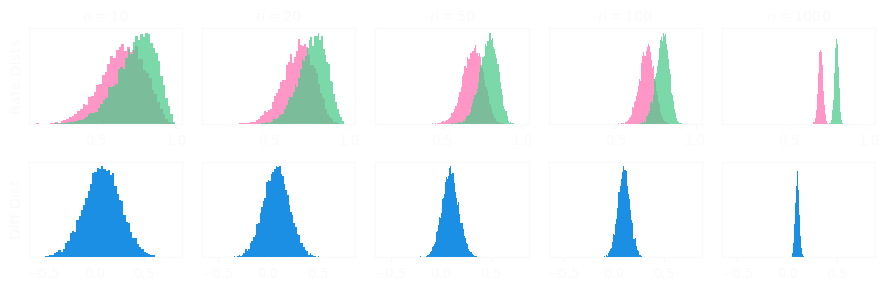

In [111]:
H = 0.0

fig, axes = plt.subplots(
    2, 5, figsize=(900 / 96, 300 / 96), dpi=96, sharex="row", sharey=False
)

for col_num, n in enumerate([10, 20, 50, 100, 1000]):
    num_losses_1, num_wins_1 = np.bincount(produce_samples_from_rate(rate=rate_1, n=n))

    experiment_1_samples = np.random.beta(
        a=1 + num_wins_1, b=1 + num_losses_1, size=10000
    )

    axes[0, col_num].hist(
        experiment_1_samples,
        bins="auto",
        density=True,
        alpha=0.75,
        facecolor=color_2,
    )

    num_losses_2, num_wins_2 = np.bincount(produce_samples_from_rate(rate=rate_2, n=n))

    experiment_2_samples = np.random.beta(
        a=1 + num_wins_2, b=1 + num_losses_2, size=10000
    )

    axes[0, col_num].hist(
        experiment_2_samples,
        bins="auto",
        density=True,
        alpha=0.75,
        facecolor=color_3,
    )

    axes[0, col_num].set_yticks([])

    axes[0, col_num].set_title(f"$n={n}$", fontsize=11)

    axes[1, col_num].hist(
        experiment_2_samples - experiment_1_samples,
        bins="auto",
        density=True,
        alpha=1.0,
        facecolor=color_primary,
    )

    axes[1, col_num].set_yticks([])

    if col_num == 0:
        axes[0, col_num].set_ylabel("Rate Dists", fontsize=11)
        axes[1, col_num].set_ylabel("Diff Dist", fontsize=11)

    color_axis(axes[0, col_num], color=color_text)
    color_axis(axes[1, col_num], color=color_text)

fig.tight_layout()


In [112]:
fig.savefig(f"./figures/two_betas_and_diff_dist_{theme}.webp", transparent=True)


In [21]:
def bayesian_compare_rates_independent(
    samples_a: np.ndarray, samples_b: np.ndarray, ci_prob: float = 0.95
) -> str:
    num_losses_a, num_wins_a = np.bincount(samples_a)
    num_losses_b, num_wins_b = np.bincount(samples_b)

    experiment_1_samples = np.random.beta(
        a=1 + num_wins_a, b=1 + num_losses_a, size=10000
    )

    experiment_2_samples = np.random.beta(
        a=1 + num_wins_b, b=1 + num_losses_b, size=10000
    )

    diff_dist = experiment_2_samples - experiment_1_samples

    median_diff = np.median(diff_dist)
    hdi = np.quantile(diff_dist, [(1 - ci_prob) / 2, 1 - ((1 - ci_prob) / 2)])

    p_direction = np.mean(experiment_2_samples > experiment_1_samples)

    n_a = num_wins_a + num_losses_a
    rate_a = num_wins_a / n_a

    n_b = num_wins_b + num_losses_b
    rate_b = num_wins_b / n_b

    result = f"Experiment 2 (rate={rate_b:.2f}, n={n_b}) being greater than experiment 1 (rate={rate_a:.2f}, n={n_a}) is {p_direction*100:.2f}% probable (median={median_diff:.4f} [{hdi[0]:.4f}, {hdi[1]:.4f}])"

    return result


In [22]:
samples_1 = produce_samples_from_rate(rate=rate_1, n=10)
samples_2 = produce_samples_from_rate(rate=rate_2, n=10)

print(bayesian_compare_rates_independent(samples_1, samples_2))


Experiment 2 (rate=0.80, n=10) being greater than experiment 1 (rate=0.70, n=10) is 68.85% probable (median=0.0866 [-0.2606, 0.4289])


In [23]:
samples_1 = produce_samples_from_rate(rate=rate_1, n=100)
samples_2 = produce_samples_from_rate(rate=rate_2, n=100)

print(bayesian_compare_rates_independent(samples_1, samples_2))


Experiment 2 (rate=0.80, n=100) being greater than experiment 1 (rate=0.70, n=100) is 95.02% probable (median=0.0974 [-0.0184, 0.2179])


In [24]:
samples_1 = produce_samples_from_rate(rate=rate_1, n=1000)
samples_2 = produce_samples_from_rate(rate=rate_2, n=1000)

print(bayesian_compare_rates_independent(samples_1, samples_2))


Experiment 2 (rate=0.80, n=1000) being greater than experiment 1 (rate=0.70, n=1000) is 100.00% probable (median=0.1003 [0.0615, 0.1373])


### Dependent Samples

In [25]:
def bayesian_compare_rates_dependent(
    samples_a: np.ndarray, samples_b: np.ndarray
) -> str:
    paired_samples = np.stack([samples_a, samples_b], axis=1)

    combinations, counts = np.unique(paired_samples, axis=0, return_counts=True)

    identical_idx = np.where(
        ((combinations[:, 0] == 0) & (combinations[:, 1] == 0))
        | ((combinations[:, 0] == 1) & (combinations[:, 1] == 1))
    )

    wins_a_idx = np.where((combinations[:, 0] == 1) & (combinations[:, 1] == 0))

    wins_b_idx = np.where((combinations[:, 0] == 0) & (combinations[:, 1] == 1))

    num_ties = np.sum(counts[identical_idx])
    num_wins_a = counts[wins_a_idx].squeeze()
    num_wins_b = counts[wins_b_idx].squeeze()

    params = np.array([num_wins_a + 1, num_wins_b + 1, num_ties + 1])

    map_win_rate_a = (params[0] - 1) / (np.sum(params) - 3)
    map_win_rate_b = (params[1] - 1) / (np.sum(params) - 3)

    dirichlet_samples = rng.dirichlet(params, size=10000)

    prob_b_greater = np.mean(dirichlet_samples[:, 1] > dirichlet_samples[:, 0])

    rate_a = np.mean(samples_1)
    rate_b = np.mean(samples_2)
    n = paired_samples.shape[0]

    result = f"Experiment 2 (rate={rate_b:.2f}, n={n}) being greater than experiment 1 (rate={rate_a:.2f}, n={n}) is {prob_b_greater*100:.2f}% probable.\nOn average, experiment 1 beat experiment 2 {map_win_rate_a*100:.2f}% of times, and experiment 2 beat experiment 1 {map_win_rate_b*100:.2f}% of times."

    return result


In [26]:
samples_1 = produce_samples_from_rate(rate=rate_1, n=10)
samples_2 = produce_samples_from_rate(rate=rate_2, n=10)

print(bayesian_compare_rates_dependent(samples_1, samples_2))


Experiment 2 (rate=0.80, n=10) being greater than experiment 1 (rate=0.70, n=10) is 66.44% probable.
On average, experiment 1 beat experiment 2 20.00% of times, and experiment 2 beat experiment 1 30.00% of times.


In [27]:
samples_1 = produce_samples_from_rate(rate=rate_1, n=100)
samples_2 = produce_samples_from_rate(rate=rate_2, n=100)

print(bayesian_compare_rates_dependent(samples_1, samples_2))


Experiment 2 (rate=0.80, n=100) being greater than experiment 1 (rate=0.70, n=100) is 93.98% probable.
On average, experiment 1 beat experiment 2 15.00% of times, and experiment 2 beat experiment 1 25.00% of times.


In [28]:
samples_1 = produce_samples_from_rate(rate=rate_1, n=1000)
samples_2 = produce_samples_from_rate(rate=rate_2, n=1000)

print(bayesian_compare_rates_dependent(samples_1, samples_2))


Experiment 2 (rate=0.80, n=1000) being greater than experiment 1 (rate=0.70, n=1000) is 100.00% probable.
On average, experiment 1 beat experiment 2 14.10% of times, and experiment 2 beat experiment 1 24.10% of times.


## Area Under the Improvement Curve

In [113]:
import statsmodels.nonparametric
import statsmodels.nonparametric.kernel_regression


In [164]:
samples_1 = rng.beta(a=4, b=2, size=1000)

odds_change = rng.gamma(shape=5, scale=0.5, size=1000)

samples_2_odds = odds(samples_1) * odds_change
samples_2 = samples_2_odds / (1 + samples_2_odds)


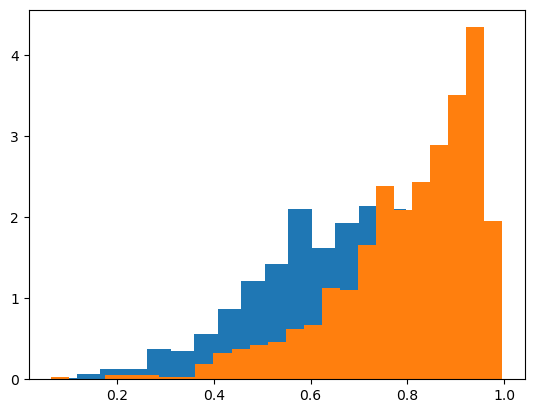

In [165]:
plt.hist(
    samples_1,
    bins="auto",
    density=True,
)

plt.hist(
    samples_2,
    bins="auto",
    density=True,
)

plt.show()


In [166]:
samples_1_ext = np.concatenate([[0], samples_1, [1]])
samples_2_ext = np.concatenate([[0], samples_2, [1]])

sort_idx = np.argsort(samples_1_ext)

sorted_samples_1 = samples_1_ext[sort_idx]

predictions, _ = statsmodels.nonparametric.kernel_regression.KernelReg(
    endog=samples_2_ext,
    exog=samples_1_ext,
    var_type="c",
).fit(sorted_samples_1)

sorted_samples_2 = samples_2_ext[sort_idx]


In [241]:
update_theme(theme="light")


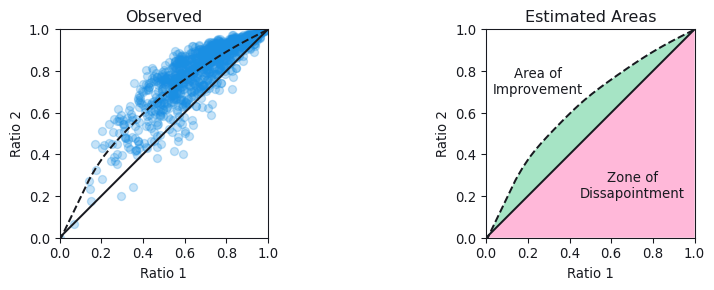

In [242]:
fig, axes = plt.subplots(1, 2, figsize=(900 / 96, 300 / 96), dpi=96)

axes[0].plot(sorted_samples_1, sorted_samples_1, c=color_text)

axes[0].scatter(sorted_samples_1, sorted_samples_2, c=color_primary, alpha=0.25)

axes[0].plot(sorted_samples_1, predictions, c=color_text, ls="--")

axes[0].set_xlim(0, 1)
axes[0].set_ylim(0, 1)

axes[0].set_xlabel("Ratio 1")
axes[0].set_ylabel("Ratio 2")

axes[0].set_aspect("equal")

axes[0].set_title(
    "Observed",
    color=color_text,
)

color_axis(axes[0], color=color_text)

axes[1].fill_between(
    sorted_samples_1,
    sorted_samples_1,
    facecolor=color_2,
    alpha=0.50,
)

axes[1].fill_between(
    sorted_samples_1,
    predictions,
    sorted_samples_1,
    facecolor=color_3,
    alpha=0.50,
)

axes[1].plot(sorted_samples_1, sorted_samples_1, c=color_text)

axes[1].plot(sorted_samples_1, predictions, c=color_text, ls="--")

axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

axes[1].set_aspect("equal")

axes[1].set_xlim(0, 1)
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Ratio 1")
axes[1].set_ylabel("Ratio 2")

axes[1].text(
    x=0.70,
    y=0.25,
    s="Zone of\nDissapointment",
    horizontalalignment="center",
    verticalalignment="center",
    color=color_text,
)

axes[1].text(
    x=0.25,
    y=0.75,
    s="Area of\nImprovement",
    horizontalalignment="center",
    verticalalignment="center",
    color=color_text,
)

axes[1].set_title(
    "Estimated Areas",
    color=color_text,
)

color_axis(axes[1], color=color_text)

fig.tight_layout()


In [243]:
fig.savefig(f"./figures/area_under_improvement_curve_{theme}.webp", transparent=True)


In [234]:
import scipy.integrate

no_improvement_area = 0.5

area = scipy.integrate.simpson(y=predictions, x=sorted_samples_1)


area, 2 * area - 1


(np.float64(0.6267495287200159), np.float64(0.25349905744003176))